In [ ]:
# Mount Google Drive with colab  
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
# importing necessary  libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import tqdm
import glob
import tensorflow 
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage import io
from skimage.color import rgb2gray
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from skimage.color import gray2rgb

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
!pip show keras

Name: keras
Version: 2.12.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [ ]:
pip install --ignore-installed Pillow==9.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 37.1 MB/s eta 0:00:00


In [ ]:
# Path to the directory containing the images
Directory = '/content/drive/MyDrive/Alzheimer_dataset'

In [ ]:
# creating new directory
import os
os.chdir("/content/drive/MyDrive/Alzheimer_dataset")

In [ ]:
# Define the directory containing the images
Zata_dir =  '/content/drive/MyDrive/Alzheimer_dataset/train'

In [ ]:
# Get a list of all the subdirectories in the Directory
subDirs = [x[0] for x in os.walk(Zata_dir)]

In [ ]:
print(subDirs)

['/content/drive/MyDrive/Alzheimer_dataset/train', '/content/drive/MyDrive/Alzheimer_dataset/train/VeryMildDemented', '/content/drive/MyDrive/Alzheimer_dataset/train/NonDemented', '/content/drive/MyDrive/Alzheimer_dataset/train/ModerateDemented', '/content/drive/MyDrive/Alzheimer_dataset/train/MildDemented']


In [ ]:
# Define the classes
classes = ['VeryMildDemented', 'NonDemented', 'moderateDemented', 'MildDemented']

In [ ]:
import os

# Define the directory where the images are stored
Zata_dir = '/content/drive/MyDrive/Alzheimer_dataset/train'

# Define the classes
classes = ['VeryMildDemented', 'NonDemented', 'ModerateDemented', 'MildDemented']

# Loop over the classes and count the number of images in each class
for class_name in classes:
    class_dir = os.path.join(Zata_dir, class_name)
    num_images = len(os.listdir(class_dir))
    print('Class {}: {} images'.format(class_name, num_images))

Class VeryMildDemented: 1792 images
Class NonDemented: 2560 images
Class ModerateDemented: 52 images
Class MildDemented: 717 images


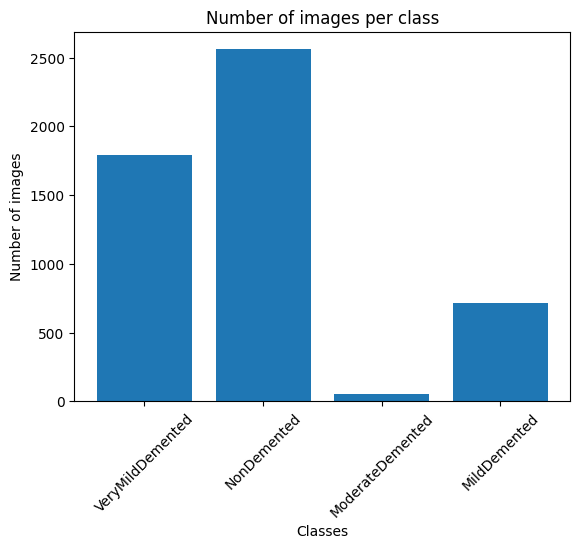

In [ ]:

# Bar chart represent the number of images in each class before Augumentation
# Define the directory where the images are stored
Zata_dir = '/content/drive/MyDrive/Alzheimer_dataset/train'

# Define the classes
classes = ['VeryMildDemented', 'NonDemented', 'ModerateDemented', 'MildDemented']

# Initialize a list to store the number of images in each class
num_images_list = []

# Loop over the classes and count the number of images in each class
for class_name in classes:
    class_dir = os.path.join(Zata_dir, class_name)
    num_images = len(os.listdir(class_dir))
    num_images_list.append(num_images)

# Plot the bar chart
plt.bar(classes, num_images_list)
plt.xlabel('Classes')
plt.xticks(rotation=45)
plt.ylabel('Number of images')
plt.title('Number of images per class')
plt.show()

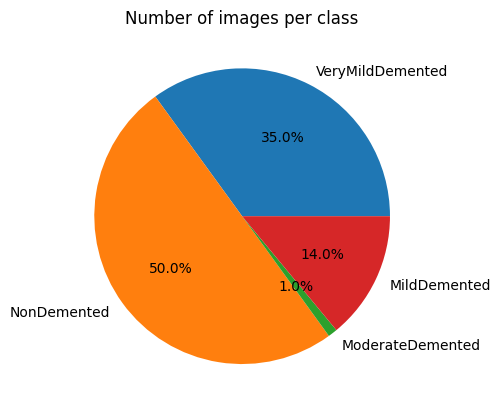

In [ ]:
# Define the directory where the images are stored
Zata_dir = '/content/drive/MyDrive/Alzheimer_dataset/train'

# Define the classes
classes = ['VeryMildDemented', 'NonDemented', 'ModerateDemented', 'MildDemented']

# Initialize a list to store the number of images in each class
num_images_list = []

# Loop over the classes and count the number of images in each class
for class_name in classes:
    class_dir = os.path.join(Zata_dir, class_name)
    num_images = len(os.listdir(class_dir))
    num_images_list.append(num_images)

# Ploting  the pie chart representing the % of the images in each class befor augmentation
plt.pie(num_images_list, labels=classes, autopct='%1.1f%%')
plt.title('Number of images per class')
plt.show()

From the charts above it could be seing that the dataset is not really balanced and to balance the dataset, The following Preprocessing and Augmentation were carried out.

In [ ]:
# set the directory name
save_dir = 'augmented_data'

# create the directory that doesn't already exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [ ]:
# set the directory containing the original images
Zata_dir = '/content/drive/MyDrive/Alzheimer_dataset/train'

# set the directory to save the augmented images
save_dir = '/content/drive/MyDrive/Aug_Alzheimer_dataset/train'

In [ ]:
# set the batch size and image dimensions
batch_size = 32
image_size = (224, 224)

# create an ImageDataGenerator object for data augmentation
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# set the directory name
save_dir = 'augmented_data'

# create the directory if it doesn't already exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# count the number of images in each class
num_images_per_class = {}
for subDirs in os.listdir(Zata_dir):
    subDirs_way = os.path.join(Zata_dir, subDirs)
    num_images_per_class[subDirs] = len(os.listdir(subDirs_way))

# determine the maximum number of images per class
max_images_per_class = max(num_images_per_class.values())

# loop through each class directory and generate augmented images
for subDirs in os.listdir(Zata_dir):
    subdir_way = os.path.join(Zata_dir, subDirs)
    num_images = len(os.listdir(subdir_way))
    if num_images < max_images_per_class:
        # create a generator for the original images in this class
        image_generator = data_generator.flow_from_directory(
            directory=Zata_dir,
            target_size=image_size,
            batch_size=batch_size,
            class_mode='categorical',
            classes=[subDirs])
        # generate augmented images and save them to disk
        num_augmentations = max_images_per_class - num_images
        num_images_added = 0
        for i in range(num_augmentations // batch_size):
            images, labels = next(image_generator)
            for j in range(len(images)):
                image = images[j]
                label = labels[j]
                save_filename = os.path.join(save_dir, subDirs + '_' + str(i*batch_size + j) + '.jpg')
                np.save(save_filename, image)
                num_images_added += 1
        print(f"Added {num_images_added} images to class {subDirs}")


Found 1792 images belonging to 1 classes.
Added 768 images to class VeryMildDemented
Found 52 images belonging to 1 classes.
Added 2028 images to class ModerateDemented
Found 717 images belonging to 1 classes.
Added 1786 images to class MildDemented


In [ ]:
import os
#os.chdir("/content/drive/MyDrive/Ahzeimer2_dataset")

In [ ]:
pwd

'/content/drive/MyDrive/Alzheimer_dataset'

Import | View | Pre-Processing DATASET


In [ ]:
# Set up the data generator
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
# Path to the directory containing the images
directory = '/content/drive/MyDrive/Ahzeimer2_dataset'

In [ ]:
# Get a list of all the subdirectories in the directory
subdirs = [x[0] for x in os.walk(directory)]

In [ ]:
# Define the directory containing the images
data_dir =  '/content/drive/MyDrive/Ahzeimer2_dataset/train'

In [ ]:
print(subdirs)

['/content/drive/MyDrive/Ahzeimer2_dataset', '/content/drive/MyDrive/Ahzeimer2_dataset/train', '/content/drive/MyDrive/Ahzeimer2_dataset/train/NonDemented', '/content/drive/MyDrive/Ahzeimer2_dataset/train/moderateDemented', '/content/drive/MyDrive/Ahzeimer2_dataset/train/VeryMildDemented', '/content/drive/MyDrive/Ahzeimer2_dataset/train/MildDemented', '/content/drive/MyDrive/Ahzeimer2_dataset/test', '/content/drive/MyDrive/Ahzeimer2_dataset/test/moderateDemented', '/content/drive/MyDrive/Ahzeimer2_dataset/test/NonDemented', '/content/drive/MyDrive/Ahzeimer2_dataset/test/MildDemented', '/content/drive/MyDrive/Ahzeimer2_dataset/test/VeryMildDemented']


In [ ]:
# Initialize a dictionary to count the number of images in each class
class_counts = {'VeryMildDemented': 0, 'NonDemented': 0, 'moderateDemented': 0, 'MildDemented': 0}

In [ ]:
# Define the directory where the Augmented images are stored
data_dir = '/content/drive/MyDrive/Ahzeimer2_dataset/train'

# Define the classes
classes = ['VeryMildDemented', 'NonDemented', 'moderateDemented', 'MildDemented']

# Loop over the classes and count the number of images in each class
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len(os.listdir(class_dir))
    print('Class {}: {} images'.format(class_name, num_images))


Class VeryMildDemented: 2040 images
Class NonDemented: 2109 images
Class moderateDemented: 2027 images
Class MildDemented: 2021 images


In [ ]:
# Define the directory where the images are stored
data_dir = '/content/drive/MyDrive/Ahzeimer2_dataset/train'

# Define the classes
classes = ['VeryMildDemented', 'NonDemented', 'moderateDemented', 'MildDemented']

# Initialize a variable to keep track of the total number of images
total_images = 0

# Loop over the classes and count the number of images in each class
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len(os.listdir(class_dir))
    total_images += num_images
    print('Class {}: {} images'.format(class_name, num_images))

# Print the total number of images
print('Total number of images: {}'.format(total_images))

Class VeryMildDemented: 2040 images
Class NonDemented: 2109 images
Class moderateDemented: 2027 images
Class MildDemented: 2021 images
Total number of images: 8197


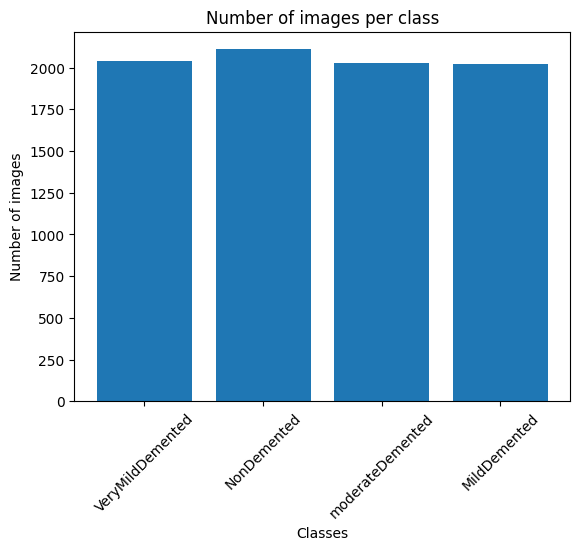

In [ ]:
# Define the directory where the images are stored
data_dir = '/content/drive/MyDrive/Ahzeimer2_dataset/train'

# Define the classes
classes = ['VeryMildDemented', 'NonDemented', 'moderateDemented', 'MildDemented']

# Initialize a list to store the number of images in each class
num_images_list = []

# Loop over the classes and count the number of images in each class and the bar chart representing the numbers of the image in eacg class after augmentation
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len(os.listdir(class_dir))
    num_images_list.append(num_images)

# Plot the bar chart
plt.bar(classes, num_images_list)
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.title('Number of images per class')
plt.xticks(rotation=45)
plt.show()

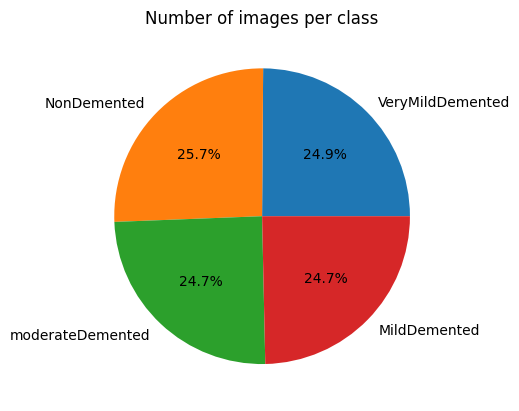

In [ ]:
# Represent the number of images in each class using pie chart after Augmentation
import os
import matplotlib.pyplot as plt

# Define the directory where the images are stored
data_dir = '/content/drive/MyDrive/Ahzeimer2_dataset/train'

# Define the classes
classes = ['VeryMildDemented', 'NonDemented', 'moderateDemented', 'MildDemented']

# Initialize a list to store the number of images in each class
num_images_list = []

# Loop over the classes and count the number of images in each class
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len(os.listdir(class_dir))
    num_images_list.append(num_images)

# Plot the pie chart
plt.pie(num_images_list, labels=classes, autopct='%1.1f%%')
plt.title('Number of images per class')
plt.show()

In [ ]:
# Define the directory containing the images
data_dir =  '/content/drive/MyDrive/Ahzeimer2_dataset/train'

In [ ]:
train_datagene = ImageDataGenerator(rescale = 1./255)

In [ ]:
print(train_datagene)

Spliting and rescaling of the Data without augmenting again.

In [ ]:

train_datagene = ImageDataGenerator(
    rescale=1./255,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    validation_split=0.2)  # split the data into training and validation sets

valid_datagene = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

test_datagene  = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Data training
train_dataset = train_datagene.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')  # set as training data

Found 6559 images belonging to 4 classes.


In [ ]:
# Data Validation
valid_dataset = valid_datagene.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')  # set as validation data

Found 1638 images belonging to 4 classes.


In [ ]:
print(train_dataset)

In [ ]:
train_dataset.class_indices

{'MildDemented': 0,
 'NonDemented': 1,
 'VeryMildDemented': 2,
 'moderateDemented': 3}

100%|██████████| 5/5 [00:00<00:00, 340.61it/s]


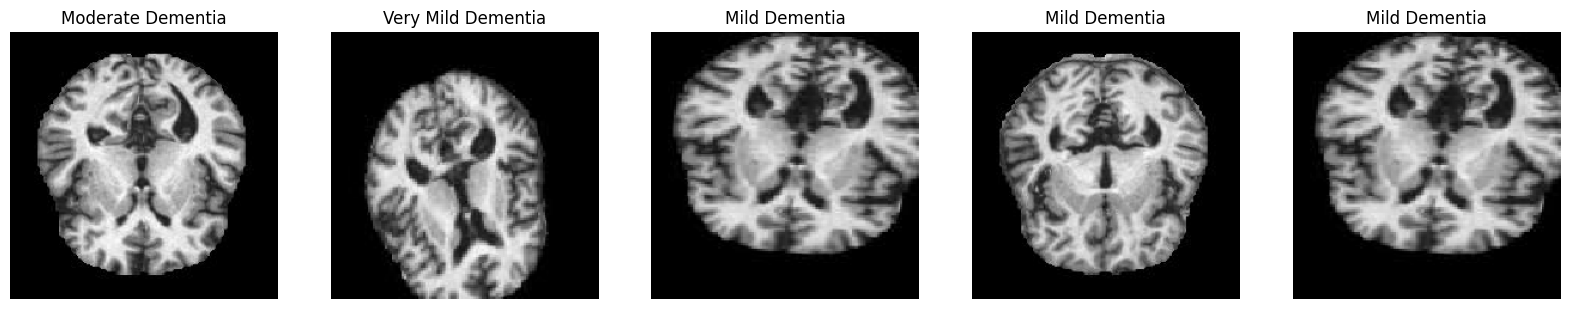

In [ ]:
# Image view of train dataset from different classes
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))
batch = next(train_dataset)
for i in tqdm(range(0, 5)):
    rand1 = np.random.randint(batch[0].shape[0])
    ax[i].imshow(batch[0][rand1])
    ax[i].axis('off')
    a = batch[1][rand1]
    if a[0] == 1:
        ax[i].set_title('Mild Dementia')
    elif a[1] == 1:
        ax[i].set_title('Moderate Dementia')
    elif a[2] == 1:
        ax[i].set_title('Non Demetia')
    elif a[3] == 1:
        ax[i].set_title('Very Mild Dementia')

100%|██████████| 5/5 [00:00<00:00, 680.96it/s]


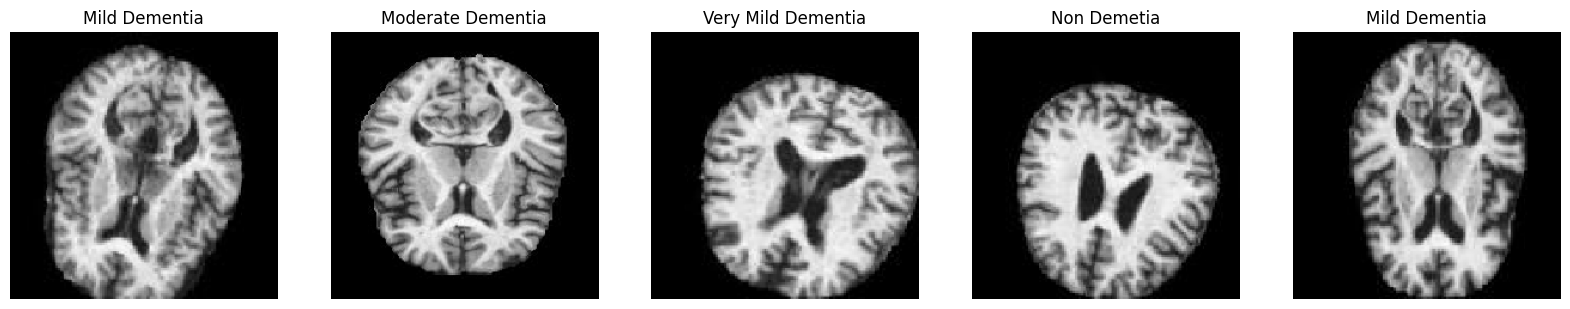

In [ ]:
# Image view of valid_dataset from diferent classes
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))
batch = next(valid_dataset)
for i in tqdm(range(0, 5)):
    rand1 = np.random.randint(batch[0].shape[0])
    ax[i].imshow(batch[0][rand1])
    ax[i].axis('off')
    a = batch[1][rand1]
    if a[0] == 1:
        ax[i].set_title('Mild Dementia')
    elif a[1] == 1:
        ax[i].set_title('Moderate Dementia')
    elif a[2] == 1:
        ax[i].set_title('Non Demetia')
    elif a[3] == 1:
        ax[i].set_title('Very Mild Dementia')

BUILDING THE MODEL

In [ ]:
# Model Initialization

base_model = DenseNet169(input_shape=(224,224,3), 
                         include_top=False,
                         weights="imagenet")

51877672/51877672 [==============================] - 0s 0us/step


In [ ]:
# Freezing Layers

for layer in base_model.layers:
    layer.trainable=False

In [ ]:
# Building Model and adjustment of the needed parameters
model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

In [ ]:
# Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 dropout (Dropout)           (None, 7, 7, 1664)        0         
                                                                 
 flatten (Flatten)           (None, 81536)             0         
                                                                 
 batch_normalization (BatchN  (None, 81536)            326144    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 2048)              166987776 
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                        

In [ ]:
# Compiling the Model
from tensorflow.keras import metrics, optimizers

opt = optimizers.Adam(learning_rate=0.001)

model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=[metrics.AUC(name='auc')]
)

In [ ]:
# Defining Callbacks

filepath = './bestest_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_auc', 
                              mode = 'max' , 
                              patience = 15,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_auc', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [ ]:
# Training the model using number of epochs
history = model.fit(train_dataset,
                    validation_data=valid_dataset,
                    epochs=100,
                    callbacks=callback_list,
                    verbose=1)

Epoch 1/100
205/205 [==============================] - ETA: 0s - loss: 0.8142 - auc: 0.9050
Epoch 1: val_auc improved from -inf to 0.86547, saving model to ./bestest_weights.hdf5
205/205 [==============================] - 1743s 8s/step - loss: 0.8142 - auc: 0.9050 - val_loss: 1.4119 - val_auc: 0.8655
Epoch 2/100
205/205 [==============================] - ETA: 0s - loss: 0.3777 - auc: 0.9743
Epoch 2: val_auc improved from 0.86547 to 0.89425, saving model to ./bestest_weights.hdf5
205/205 [==============================] - 53s 260ms/step - loss: 0.3777 - auc: 0.9743 - val_loss: 1.2582 - val_auc: 0.8942
Epoch 3/100
205/205 [==============================] - ETA: 0s - loss: 0.2549 - auc: 0.9874
Epoch 3: val_auc improved from 0.89425 to 0.89832, saving model to ./bestest_weights.hdf5
205/205 [==============================] - 54s 265ms/step - loss: 0.2549 - auc: 0.9874 - val_loss: 1.3053 - val_auc: 0.8983
Epoch 4/100
205/205 [==============================] - ETA: 0s - loss: 0.1904 - auc: 0

EVALUATION OF THE MODEL

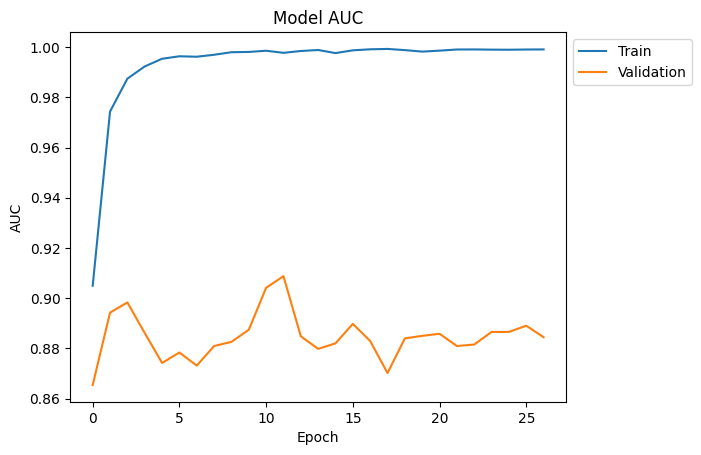

In [ ]:
# History for loss and Value accuracy summary

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

 EVALUATION OF THE MODEL

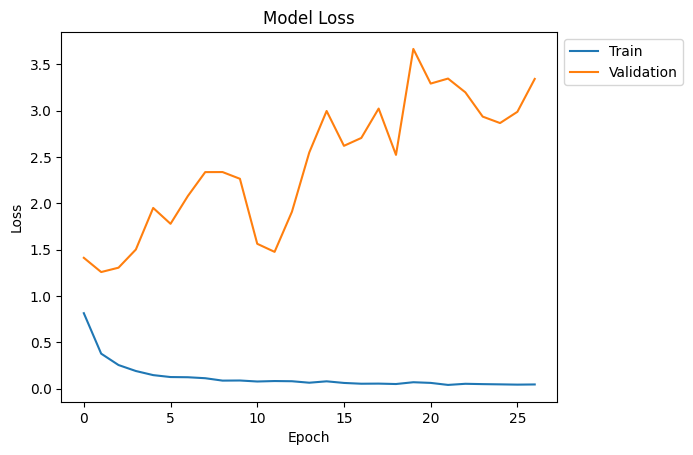

In [ ]:
# Summary of the history for loss function
# first 'history' in the code = model history

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [ ]:
# Define the directory containing the images
data_dir =  '/content/drive/MyDrive/Ahzeimer2_dataset/train'

In [ ]:
Data_dir = '/content/drive/MyDrive/Ahzeimer2_dataset/test'

In [ ]:
# Testing the Model Using test dataset
test_dataset  = test_datagene.flow_from_directory(Data_dir,
                                                 target_size = (224,224),
                                                 class_mode = 'categorical',
                                                 batch_size = 32)

Found 1657 images belonging to 4 classes.


In [ ]:
#  loss and AUC Evaluation

model.evaluate(test_dataset)

52/52 [==============================] - 225s 4s/step - loss: 0.2922 - auc: 0.9860


[0.2921597361564636, 0.9860154986381531]

In [ ]:
Pata_dir ='/content/drive/MyDrive/Ahzeimer2_dataset/test/NonDemented'

1/1 [==============================] - 0s 52ms/step
100.0 % chances are there that the image is Non-Dementia


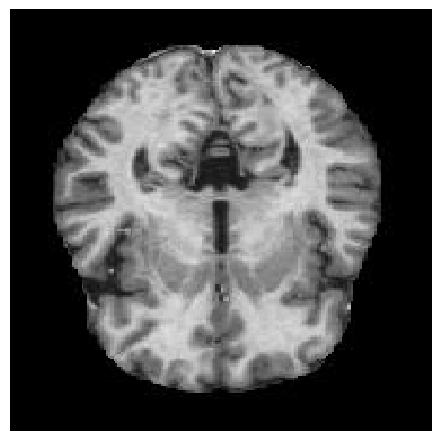

In [ ]:
# test case No. 1 ; Non  Dementia 
dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/Ahzeimer2_dataset/test/NonDemented/nonDem175.jpg',target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = (model.predict(img) > 0.5).astype("int32")
#probability = round(np.max(model.predict_proba(img)*100),2)

probability = round(np.max(model.predict(img)*100),2)

#predict_classes=np.argmax(predict_prob,axis=1)

print(probability, '% chances are there that the image is Non-Dementia')

In [ ]:
Gata_dir = '/content/drive/MyDrive/Ahzeimer2_dataset/test/MildDemented'

1/1 [==============================] - 0s 34ms/step
100.0 % chances are there that the image is Mild Demented


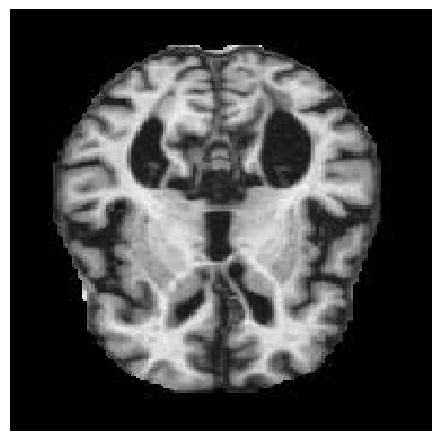

In [ ]:
# test case; 2 Mild Demented 

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/Ahzeimer2_dataset/test/MildDemented/mildDem112.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model.predict_classes(img)
answer = (model.predict(img) > 0.5).astype("int32")
#probability = round(np.max(model.predict_proba(img)*100),2)

probability = round(np.max(model.predict(img)*100),2)

#predict_classes=np.argmax(predict_prob,axis=1)

print(probability, '% chances are there that the image is Mild Demented')

In [ ]:
Gata_dir = '/content/drive/MyDrive/Ahzeimer2_dataset/test/VeryMildDemented'

1/1 [==============================] - 0s 35ms/step
99.99 % chances are there that the image is Very Mild Demented


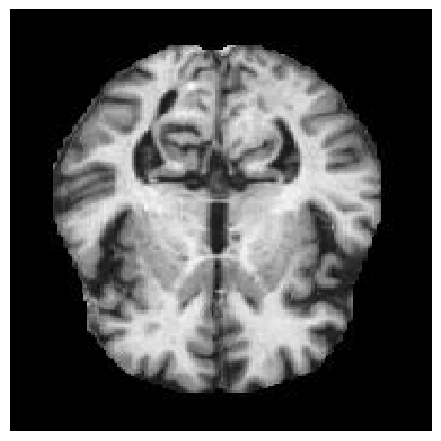

In [ ]:
# test case; 3 Very Mild Demented 

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/Ahzeimer2_dataset/test/VeryMildDemented/verymildDem211.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model.predict_classes(img)
answer = (model.predict(img) > 0.5).astype("int32")
#probability = round(np.max(model.predict_proba(img)*100),2)

probability = round(np.max(model.predict(img)*100),2)

#predict_classes=np.argmax(predict_prob,axis=1)

print(probability, '% chances are there that the image is Very Mild Demented')

In [ ]:
Jata_dir = '/content/drive/MyDrive/Ahzeimer2_dataset/test/moderateDemented'

1/1 [==============================] - 0s 45ms/step
100.0 % chances are there that the image is Moderate Demented


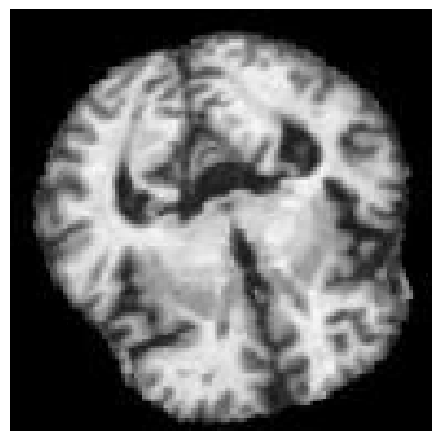

In [ ]:
# test case 4; Moderate Demented.

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/Ahzeimer2_dataset/test/moderateDemented/ModerateDemented_484.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = (model.predict(img) > 0.5).astype("int32")
#probability = round(np.max(model.predict_proba(img)*100),2)

probability = round(np.max(model.predict(img)*100),2)

#predict_classes=np.argmax(predict_prob,axis=1)

print(probability, '% chances are there that the image is Moderate Demented')

Conclusion: A deep learning model using DenseNet162 transfer learning Model was built and achieveD AUC.98.54%

Ensemble of Densenete169 and VGG16

In [ ]:
# Importing the Necessary Libraries
import numpy as np
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
# Define the input shape
input_shape = (224, 224, 3)

# Define the number of classes
num_classes = 4

# Load the pre-trained models
densenet_model = DenseNet169(weights='imagenet', include_top=False, input_shape=input_shape)
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers in both models
for layer in densenet_model.layers:
    layer.trainable = False

for layer in vgg16_model.layers:
    layer.trainable = False

# Define the inputs to the model
inputs = Input(shape=input_shape)

# Get the output from both models
densenet_output = densenet_model(inputs)
vgg16_output = vgg16_model(inputs)

# Flatten the output from both models
densenet_output = Flatten()(densenet_output)
vgg16_output = Flatten()(vgg16_output)

# Concatenate the output from both models
merged_output = Concatenate()([densenet_output, vgg16_output])

# Define the output layer
output_layer = Dense(num_classes, activation='softmax')(merged_output)

# Define the model
model1 = Model(inputs=inputs, outputs=output_layer)

# Compile the model with the updated learning rate parameter name
#model1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Compiling the Model
from tensorflow.keras import metrics, optimizers

opt = optimizers.Adam(learning_rate=0.001)

model1.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=[metrics.AUC(name='auc')]
)

In [ ]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 densenet169 (Functional)       (None, 7, 7, 1664)   12642880    ['input_4[0][0]']                
                                                                                                  
 vgg16 (Functional)             (None, 7, 7, 512)    14714688    ['input_4[0][0]']                
                                                                                                  
 flatten_1 (Flatten)            (None, 81536)        0           ['densenet169[0][0]']        

In [ ]:
# Defining Callbacks

filepath = './EnDV1_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_auc', 
                              mode = 'max' , 
                              patience = 15,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_auc', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [ ]:
# Training the model using number of epochs
history = model1.fit(train_dataset,
                    validation_data=valid_dataset,
                    epochs=100,
                    callbacks=callback_list,
                    verbose=1)

Epoch 1/100
205/205 [==============================] - ETA: 0s - loss: 3.0093 - auc: 0.8444
Epoch 1: val_auc improved from -inf to 0.82173, saving model to ./EnDV1_weights.hdf5
205/205 [==============================] - 98s 409ms/step - loss: 3.0093 - auc: 0.8444 - val_loss: 7.3954 - val_auc: 0.8217
Epoch 2/100
205/205 [==============================] - ETA: 0s - loss: 1.0504 - auc: 0.9339
Epoch 2: val_auc improved from 0.82173 to 0.83515, saving model to ./EnDV1_weights.hdf5
205/205 [==============================] - 72s 349ms/step - loss: 1.0504 - auc: 0.9339 - val_loss: 4.0794 - val_auc: 0.8351
Epoch 3/100
205/205 [==============================] - ETA: 0s - loss: 0.4998 - auc: 0.9698
Epoch 3: val_auc did not improve from 0.83515
205/205 [==============================] - 61s 299ms/step - loss: 0.4998 - auc: 0.9698 - val_loss: 5.1167 - val_auc: 0.8335
Epoch 4/100
205/205 [==============================] - ETA: 0s - loss: 0.4653 - auc: 0.9737
Epoch 4: val_auc improved from 0.83515 to

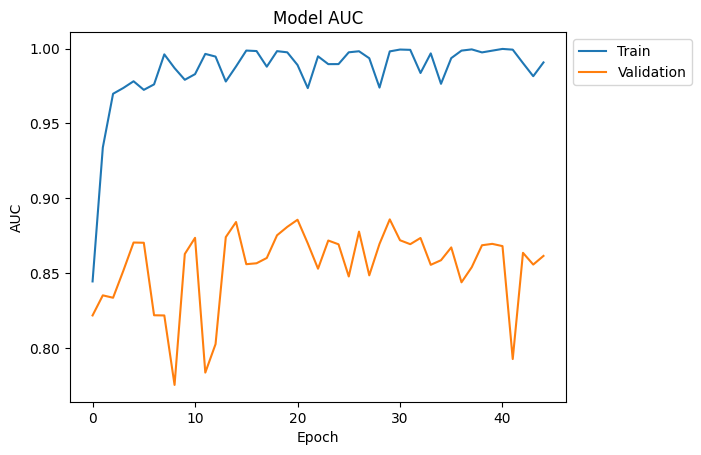

In [ ]:
# History for loss and Value accuracy summary

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

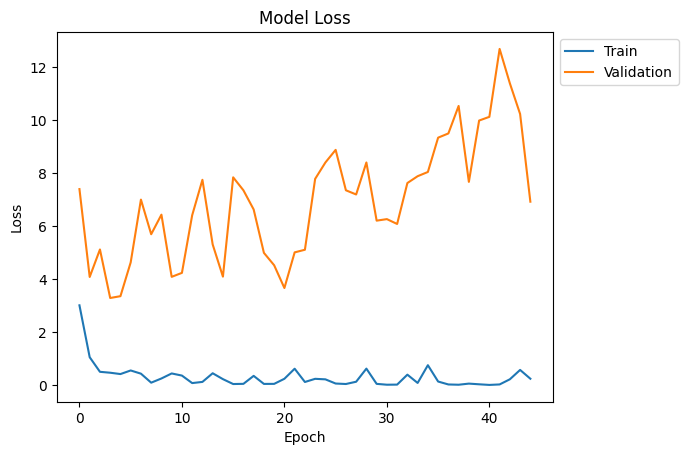

In [ ]:
# Summary of the history for loss function
# first 'history' in the code = model history

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [ ]:
#  loss and AUC Evaluation

model1.evaluate(test_dataset)

52/52 [==============================] - 12s 235ms/step - loss: 2.8902 - auc: 0.9596


[2.8901729583740234, 0.9595626592636108]

1/1 [==============================] - 3s 3s/step
100.0 % chances are there that the image is Non-Dementia


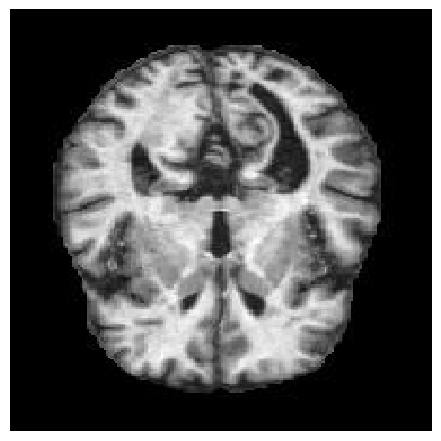

In [ ]:
# test case No. 1 ; Non  Dementia 
dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/Ahzeimer2_dataset/test/NonDemented/nonDem171.jpg',target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = (model.predict(img) > 0.5).astype("int32")
#probability = round(np.max(model1.predict_proba(img)*100),2)

probability = round(np.max(model1.predict(img)*100),2)

#predict_classes=np.argmax(predict_prob,axis=1)

print(probability, '% chances are there that the image is Non-Dementia')

1/1 [==============================] - 0s 36ms/step
100.0 % chances are there that the image is Mild Demented


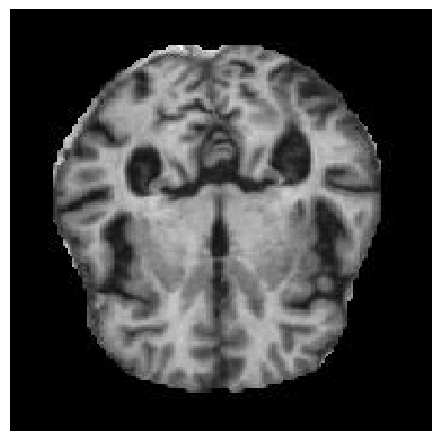

In [ ]:
# test case; 2 Mild Demented 

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/Ahzeimer2_dataset/test/MildDemented/mildDem3.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model1.predict_classes(img)
answer = (model1.predict(img) > 0.5).astype("int32")
#probability = round(np.max(model1.predict_proba(img)*100),2)

probability = round(np.max(model1.predict(img)*100),2)

#predict_classes=np.argmax(predict_prob,axis=1)

print(probability, '% chances are there that the image is Mild Demented')

1/1 [==============================] - 0s 35ms/step
100.0 % chances are there that the image is Very Mild Demented


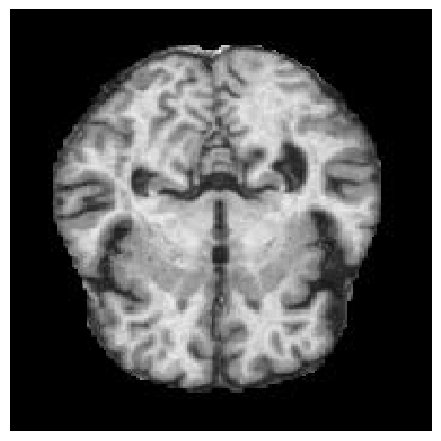

In [ ]:
# test case; 3 very Mild Demented 

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/Ahzeimer2_dataset/test/VeryMildDemented/verymildDem21.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model1.predict_classes(img)
answer = (model1.predict(img) > 0.5).astype("int32")
#probability = round(np.max(model.predict_proba(img)*100),2)

probability = round(np.max(model1.predict(img)*100),2)

#predict_classes=np.argmax(predict_prob,axis=1)

print(probability, '% chances are there that the image is Very Mild Demented')

1/1 [==============================] - 0s 38ms/step
100.0 % chances are there that the image is Moderate Demented


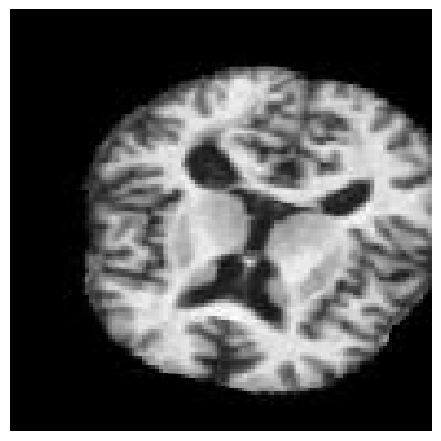

In [ ]:
# test case 4; Moderate Demented.

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/Ahzeimer2_dataset/test/moderateDemented/ModerateDemented_411.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = (model1.predict(img) > 0.5).astype("int32")
#probability = round(np.max(model1.predict_proba(img)*100),2)

probability = round(np.max(model1.predict(img)*100),2)

#predict_classes=np.argmax(predict_prob,axis=1)

print(probability, '% chances are there that the image is Moderate Demented')

Densenet201

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Define the input shape of the image
input_shape = (224, 224, 3)

# Load the pre-trained DenseNet-201 model
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape)

# Add a global average pooling layer and a dense output layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

74836368/74836368 [==============================] - 1s 0us/step


In [ ]:
# Define the complete model
model2 = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compiling the Model
from tensorflow.keras import metrics, optimizers

opt = optimizers.Adam(learning_rate=0.001)

model2.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=[metrics.AUC(name='auc')]
)

In [ ]:

# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])1

# Print the model summary
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [ ]:
# Defining Callbacks

filepath = './DEN201F_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_auc', 
                              mode = 'max' , 
                              patience = 15,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_auc', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [ ]:
# Training the model using number of epochs
history = model2.fit(train_dataset,
                    validation_data=valid_dataset,
                    epochs=200,
                    callbacks=callback_list,
                    verbose=1)

Epoch 1/200
205/205 [==============================] - ETA: 0s - loss: 0.7031 - auc: 0.9110 
Epoch 1: val_auc improved from -inf to 0.65733, saving model to ./DEN201F_weights.hdf5
205/205 [==============================] - 2843s 13s/step - loss: 0.7031 - auc: 0.9110 - val_loss: 8.5894 - val_auc: 0.6573
Epoch 2/200
205/205 [==============================] - ETA: 0s - loss: 0.4877 - auc: 0.9567
Epoch 2: val_auc improved from 0.65733 to 0.78685, saving model to ./DEN201F_weights.hdf5
205/205 [==============================] - 41s 199ms/step - loss: 0.4877 - auc: 0.9567 - val_loss: 1.7638 - val_auc: 0.7869
Epoch 3/200
205/205 [==============================] - ETA: 0s - loss: 0.3630 - auc: 0.9759
Epoch 3: val_auc did not improve from 0.78685
205/205 [==============================] - 34s 166ms/step - loss: 0.3630 - auc: 0.9759 - val_loss: 8.3588 - val_auc: 0.5603
Epoch 4/200
205/205 [==============================] - ETA: 0s - loss: 0.2483 - auc: 0.9884
Epoch 4: val_auc did not improve fro

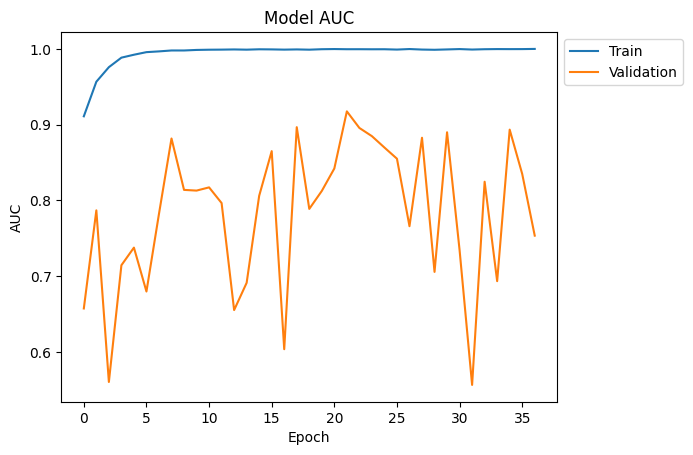

In [ ]:
# History for loss and Value accuracy summary

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

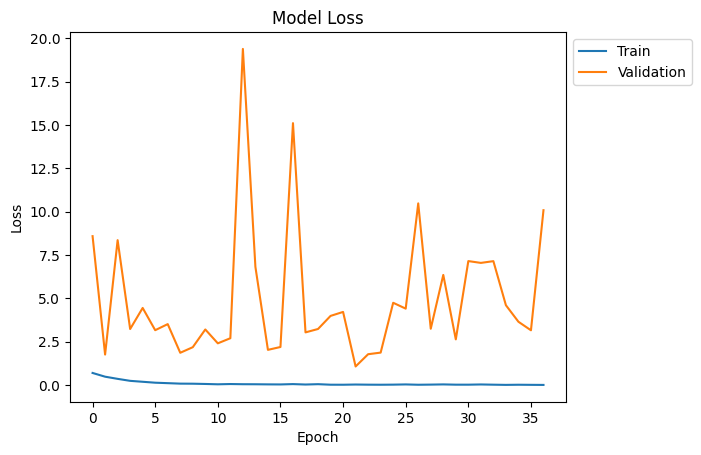

In [ ]:
# Summary of the history for loss function
# first 'history' in the code = model history

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [ ]:
#  loss and AUC Evaluation

model2.evaluate(test_dataset)

52/52 [==============================] - 327s 6s/step - loss: 2.6197 - auc: 0.8362


[2.6196787357330322, 0.836174726486206]

1/1 [==============================] - 0s 37ms/step
76.18 % chances are there that the image is Non-Dementia


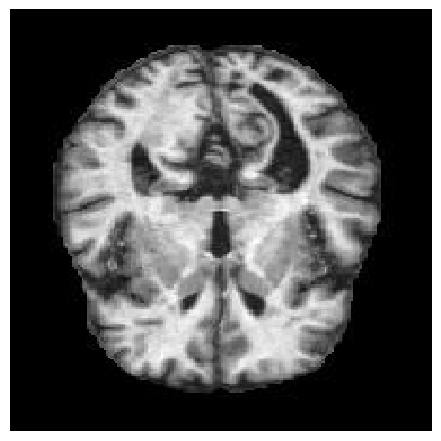

In [ ]:
# test case No. 1 ; Non  Dementia 
dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/Ahzeimer2_dataset/test/NonDemented/nonDem171.jpg',target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = (model2.predict(img) > 0.5).astype("int32")
#probability = round(np.max(model2.predict_proba(img)*100),2)

probability = round(np.max(model2.predict(img)*100),2)

#predict_classes=np.argmax(predict_prob,axis=1)

print(probability, '% chances are there that the image is Non-Dementia')

1/1 [==============================] - 0s 39ms/step
100.0 % chances are there that the image is Mild Demented


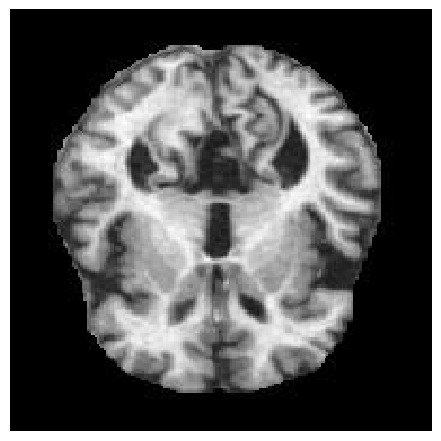

In [ ]:
# test case; 2 Mild Demented 

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/Ahzeimer2_dataset/test/MildDemented/mildDem111.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model2.predict_classes(img)
answer = (model2.predict(img) > 0.5).astype("int32")
#probability = round(np.max(model2.predict_proba(img)*100),2)

probability = round(np.max(model2.predict(img)*100),2)

#predict_classes=np.argmax(predict_prob,axis=1)

print(probability, '% chances are there that the image is Mild Demented')

1/1 [==============================] - 0s 39ms/step
82.51 % chances are there that the image is Very Mild Demented


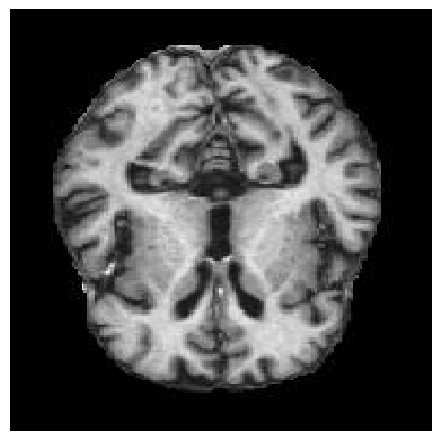

In [ ]:
# test case; 3 very Mild Demented 

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/Ahzeimer2_dataset/test/VeryMildDemented/verymildDem100.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model2.predict_classes(img)
answer = (model2.predict(img) > 0.5).astype("int32")
#probability = round(np.max(mode2.predict_proba(img)*100),2)

probability = round(np.max(model2.predict(img)*100),2)

#predict_classes=np.argmax(predict_prob,axis=1)

print(probability, '% chances are there that the image is Very Mild Demented')

1/1 [==============================] - 0s 42ms/step
100.0 % chances are there that the image is Moderate Demented


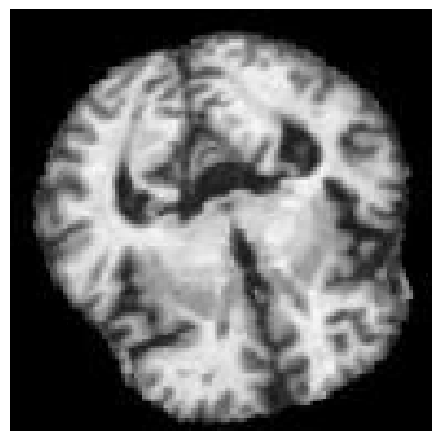

In [ ]:
# test case 4; Moderate Demented.

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/Ahzeimer2_dataset/test/moderateDemented/ModerateDemented_484.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = (model2.predict(img) > 0.5).astype("int32")
#probability = round(np.max(model2.predict_proba(img)*100),2)

probability = round(np.max(model2.predict(img)*100),2)

#predict_classes=np.argmax(predict_prob,axis=1)

print(probability, '% chances are there that the image is Moderate Demented')

RESNET50

In [ ]:
# Importing Necessary Libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [ ]:
# Load ResNet50 model without the top layer
resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:

# Freeze the ResNet50 layers
for layer in resnet.layers:
    layer.trainable = False

# Add your own classification layers
x = Flatten()(resnet.output)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

# Create the model
model3 = Model(inputs=resnet.input, outputs=x)

In [ ]:
# Model Compile

from tensorflow.keras import optimizers
from tensorflow.keras.metrics import AUC

# Define the optimizer
adam = optimizers.Adam(learning_rate=0.001)

# Compile the model
model3.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=[AUC(name='auc')])

In [ ]:
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
# Defining Callbacks 
filepath = './NRESNET50_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_auc', 
                              mode = 'max' , 
                              patience = 15,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_auc', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [ ]:
# Training the model adopting number of epochs 

history=model3.fit(train_dataset,
                        validation_data=valid_dataset,
                        epochs = 100, # Number of epochs can be changed  
                        callbacks = callback_list,
                        verbose = 1)

Epoch 1/100
205/205 [==============================] - ETA: 0s - loss: 1.7446 - auc: 0.7191
Epoch 1: val_auc improved from -inf to 0.73212, saving model to ./NRESNET50_weights.hdf5
205/205 [==============================] - 30s 127ms/step - loss: 1.7446 - auc: 0.7191 - val_loss: 1.6283 - val_auc: 0.7321
Epoch 2/100
205/205 [==============================] - ETA: 0s - loss: 0.8814 - auc: 0.8512
Epoch 2: val_auc improved from 0.73212 to 0.78772, saving model to ./NRESNET50_weights.hdf5
205/205 [==============================] - 20s 95ms/step - loss: 0.8814 - auc: 0.8512 - val_loss: 1.4246 - val_auc: 0.7877
Epoch 3/100
205/205 [==============================] - ETA: 0s - loss: 0.8667 - auc: 0.8548
Epoch 3: val_auc did not improve from 0.78772
205/205 [==============================] - 18s 86ms/step - loss: 0.8667 - auc: 0.8548 - val_loss: 1.7606 - val_auc: 0.7532
Epoch 4/100
205/205 [==============================] - ETA: 0s - loss: 0.8091 - auc: 0.8705
Epoch 4: val_auc did not improve fr

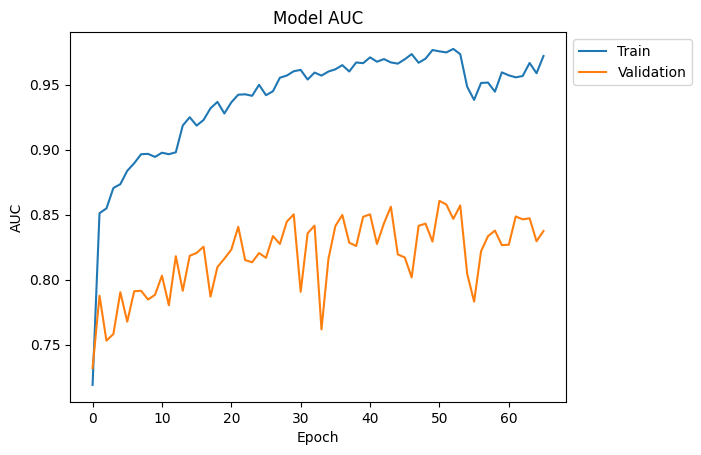

In [ ]:
# History for loss and Value accuracy summary

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

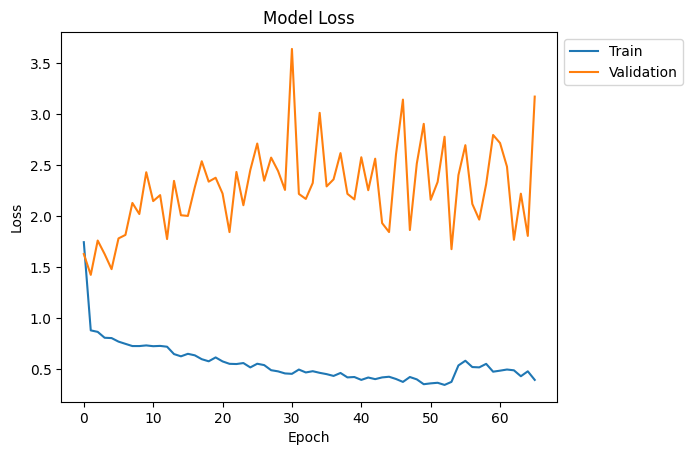

In [ ]:
# Summary of the history for loss function
# first 'history' in the code = model history

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [ ]:
#  loss and AUC Evaluation

model3.evaluate(test_dataset)

52/52 [==============================] - 4s 74ms/step - loss: 0.7660 - auc: 0.9089


[0.7660177946090698, 0.9088692665100098]

1/1 [==============================] - 0s 29ms/step
54.21 % chances are there that the image is Non-Dementia


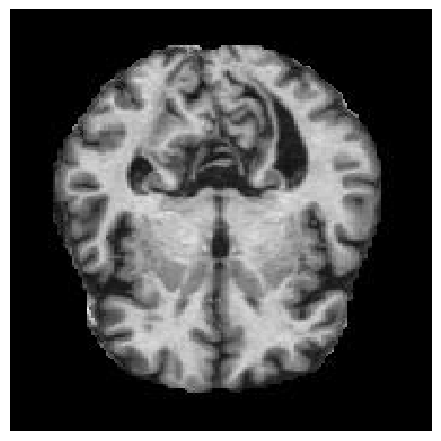

In [ ]:
# test case No. 1 ; Non  Dementia 
dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/Ahzeimer2_dataset/test/NonDemented/nonDem72.jpg',target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = (model3.predict(img) > 0.5).astype("int32")
#probability = round(np.max(model3.predict_proba(img)*100),2)

probability = round(np.max(model3.predict(img)*100),2)

#predict_classes=np.argmax(predict_prob,axis=1)

print(probability, '% chances are there that the image is Non-Dementia')

1/1 [==============================] - 0s 26ms/step
75.9 % chances are there that the image is Mild Demented


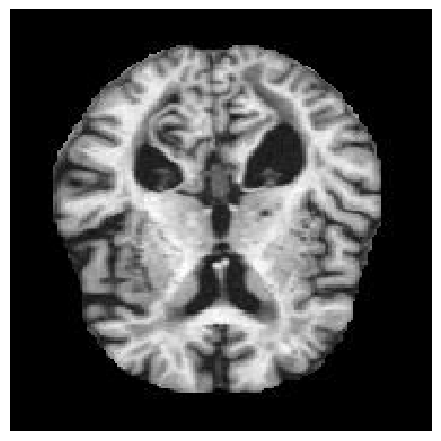

In [ ]:
# test case; 2 Mild Demented 

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/Ahzeimer2_dataset/test/MildDemented/mildDem211.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model3.predict_classes(img)
answer = (model3.predict(img) > 0.5).astype("int32")
#probability = round(np.max(model2.predict_proba(img)*100),2)

probability = round(np.max(model3.predict(img)*100),2)

#predict_classes=np.argmax(predict_prob,axis=1)

print(probability, '% chances are there that the image is Mild Demented')

1/1 [==============================] - 0s 28ms/step
52.78 % chances are there that the image is Very Mild Demented


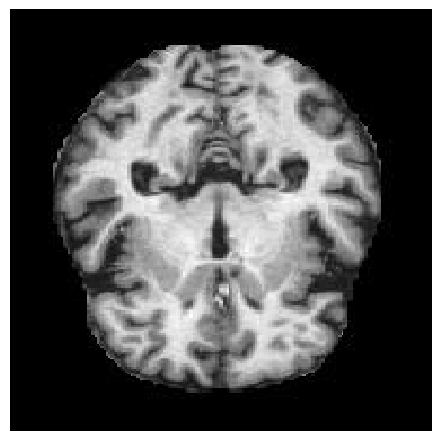

In [ ]:
# test case; 3 very Mild Demented 

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/Ahzeimer2_dataset/test/VeryMildDemented/verymildDem12.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model3.predict_classes(img)
answer = (model3.predict(img) > 0.5).astype("int32")
#probability = round(np.max(mode2.predict_proba(img)*100),2)

probability = round(np.max(model3.predict(img)*100),2)

#predict_classes=np.argmax(predict_prob,axis=1)

print(probability, '% chances are there that the image is Very Mild Demented')

1/1 [==============================] - 0s 24ms/step
99.81 % chances are there that the image is Moderate Demented


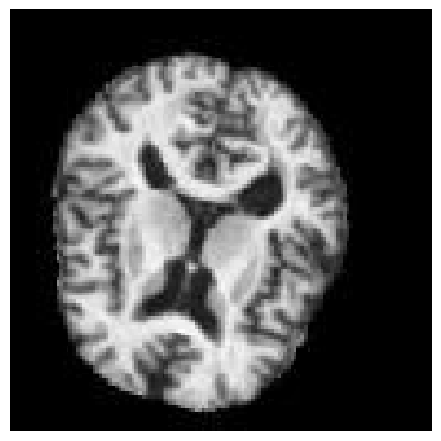

In [ ]:
# test case 4; Moderate Demented.

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/Ahzeimer2_dataset/test/moderateDemented/ModerateDemented_531.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = (model3.predict(img) > 0.5).astype("int32")
#probability = round(np.max(model3.predict_proba(img)*100),2)

probability = round(np.max(model3.predict(img)*100),2)

#predict_classes=np.argmax(predict_prob,axis=1)

print(probability, '% chances are there that the image is Moderate Demented')

CNN

In [ ]:
#Importing Necessary Libraries
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# Define the model architecture
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model5.add(MaxPooling2D((2, 2)))
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D((2, 2)))
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D((2, 2)))
model5.add(Flatten())
model5.add(Dense(64, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(4, activation='softmax'))

In [ ]:
# Compiling the Model
from tensorflow.keras import metrics, optimizers

opt = optimizers.Adam(learning_rate=0.001)

model5.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=[metrics.AUC(name='auc')]
)

In [ ]:
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [ ]:
# Defining Callbacks

filepath = './CNN3_wieght.hdf5'

earlystopping = EarlyStopping(monitor = 'val_auc', 
                              mode = 'max' , 
                              patience = 15,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_auc', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [ ]:
# Training the model using number of epochs
history = model5.fit(train_dataset,
                    validation_data=valid_dataset,
                    epochs=100,
                    callbacks=callback_list,
                    verbose=1)

Epoch 1/100
205/205 [==============================] - ETA: 0s - loss: 0.9906 - auc: 0.8021
Epoch 1: val_auc improved from -inf to 0.75020, saving model to ./CNN3_wieght.hdf5
205/205 [==============================] - 21s 90ms/step - loss: 0.9906 - auc: 0.8021 - val_loss: 2.1318 - val_auc: 0.7502
Epoch 2/100
205/205 [==============================] - ETA: 0s - loss: 0.8309 - auc: 0.8535
Epoch 2: val_auc improved from 0.75020 to 0.78058, saving model to ./CNN3_wieght.hdf5
205/205 [==============================] - 17s 85ms/step - loss: 0.8309 - auc: 0.8535 - val_loss: 2.1198 - val_auc: 0.7806
Epoch 3/100
205/205 [==============================] - ETA: 0s - loss: 0.7498 - auc: 0.8836
Epoch 3: val_auc did not improve from 0.78058
205/205 [==============================] - 17s 83ms/step - loss: 0.7498 - auc: 0.8836 - val_loss: 3.1825 - val_auc: 0.7682
Epoch 4/100
205/205 [==============================] - ETA: 0s - loss: 0.6511 - auc: 0.9127
Epoch 4: val_auc improved from 0.78058 to 0.8070

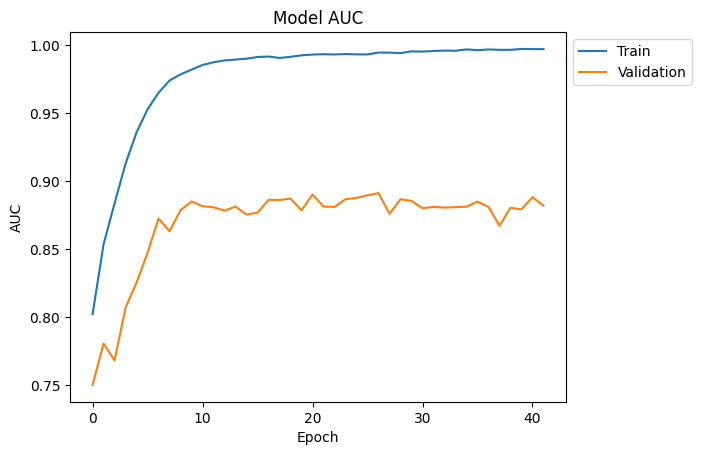

In [ ]:
# History for loss and Value accuracy summary

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

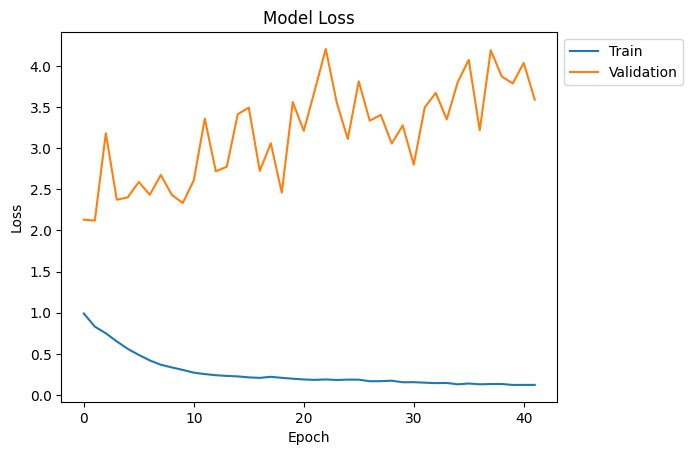

In [ ]:
# Summary of the history for loss function
# first 'history' in the code = model history

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [ ]:
#  loss and AUC Evaluation

model5.evaluate(test_dataset)

52/52 [==============================] - 4s 68ms/step - loss: 0.1592 - auc: 0.9929


[0.1592220515012741, 0.9928858280181885]

1/1 [==============================] - 0s 23ms/step
100.0 % chances are there that the image is Non-Dementia


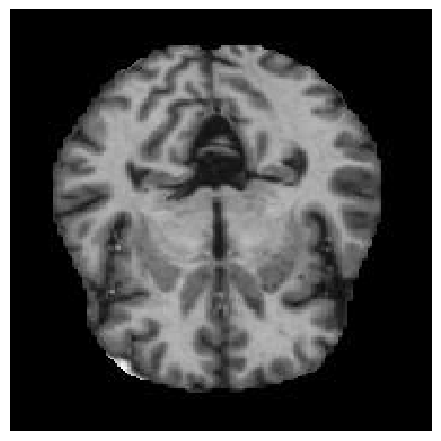

In [ ]:
# test case No. 1 ; Non  Dementia 
dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/Ahzeimer2_dataset/test/NonDemented/nonDem98.jpg',target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = (model5.predict(img) > 0.5).astype("int32")
#probability = round(np.max(model5.predict_proba(img)*100),2)

probability = round(np.max(model5.predict(img)*100),2)

#predict_classes=np.argmax(predict_prob,axis=1)

print(probability, '% chances are there that the image is Non-Dementia')

1/1 [==============================] - 0s 21ms/step
100.0 % chances are there that the image is Mild Demented


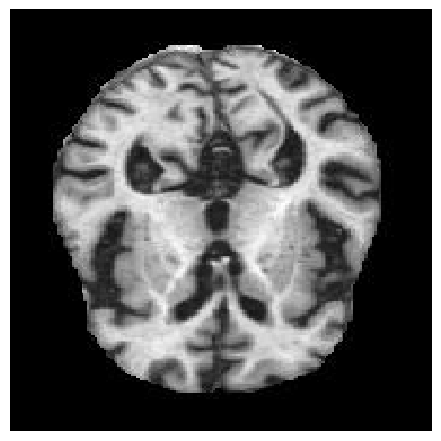

In [ ]:
# test case; 2 Mild Demented 

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/Ahzeimer2_dataset/test/MildDemented/mildDem98.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model5.predict_classes(img)
answer = (model5.predict(img) > 0.5).astype("int32")
#probability = round(np.max(model2.predict_proba(img)*100),2)

probability = round(np.max(model5.predict(img)*100),2)

#predict_classes=np.argmax(predict_prob,axis=1)

print(probability, '% chances are there that the image is Mild Demented')

1/1 [==============================] - 0s 22ms/step
100.0 % chances are there that the image is Very Mild Demented


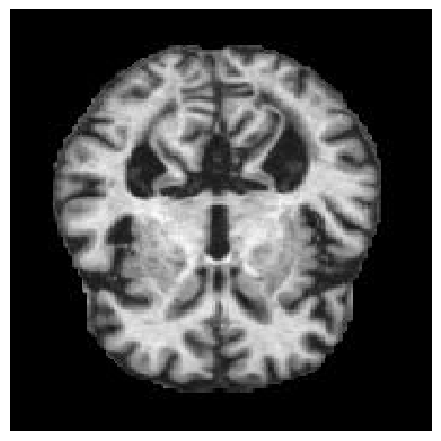

In [ ]:
# test case; 3 very Mild Demented 

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/Ahzeimer2_dataset/test/VeryMildDemented/verymildDem193.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model5.predict_classes(img)
answer = (model5.predict(img) > 0.5).astype("int32")
#probability = round(np.max(mode2.predict_proba(img)*100),2)

probability = round(np.max(model5.predict(img)*100),2)

#predict_classes=np.argmax(predict_prob,axis=1)

print(probability, '% chances are there that the image is Very Mild Demented')

1/1 [==============================] - 0s 21ms/step
100.0 % chances are there that the image is Moderate Demented


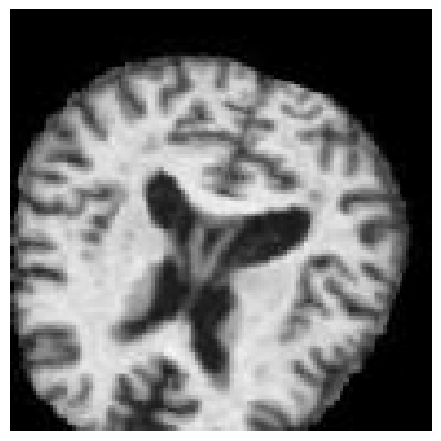

In [ ]:
# test case 4; Moderate Demented.

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/Ahzeimer2_dataset/test/moderateDemented/ModerateDemented_494.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = (model5.predict(img) > 0.5).astype("int32")
#probability = round(np.max(model5.predict_proba(img)*100),2)

probability = round(np.max(model5.predict(img)*100),2)

#predict_classes=np.argmax(predict_prob,axis=1)

print(probability, '% chances are there that the image is Moderate Demented')

100%|██████████| 5/5 [00:00<00:00, 516.77it/s]


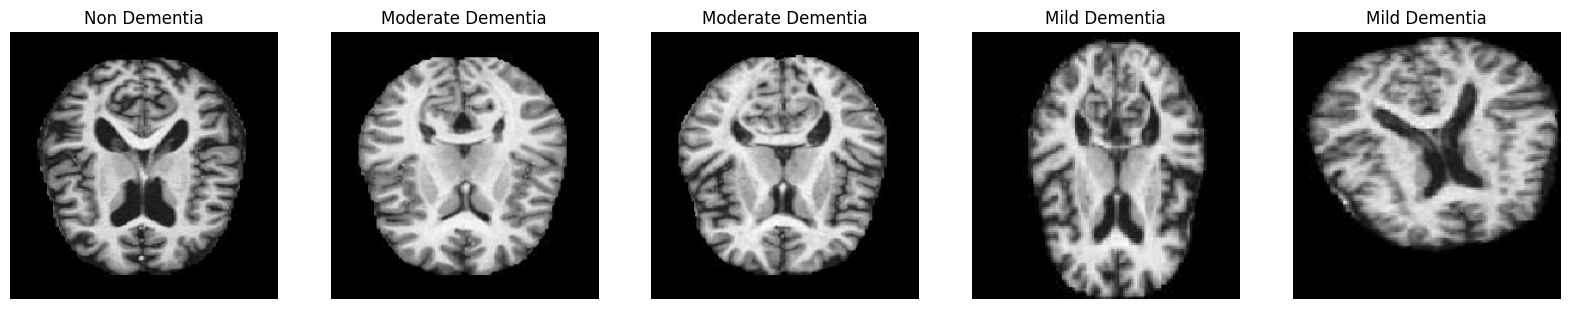

In [ ]:
#Trying to detecting the location of the disease by converting the images to grayscale

import cv2
import numpy as np

# Image view of valid_dataset from different classes
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))
batch = next(valid_dataset)
for i in tqdm(range(0, 5)):
    rand1 = np.random.randint(batch[0].shape[0])
    
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(batch[0][rand1], cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding to create a binary image
    _, thresh_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
    
    # Convert the binary image to the correct type
    thresh_img = thresh_img.astype(np.uint8)
    
    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw contours on the original image
    img_with_contours = cv2.drawContours(batch[0][rand1].copy(), contours, -1, (0, 0, 255), 2)
    
    ax[i].imshow(img_with_contours)
    ax[i].axis('off')
    a = batch[1][rand1]
    if a[0] == 1:
        ax[i].set_title('Mild Dementia')
    elif a[1] == 1:
        ax[i].set_title('Moderate Dementia')
    elif a[2] == 1:
        ax[i].set_title('Non Dementia')
    elif a[3] == 1:
        ax[i].set_title('Very Mild Dementia')


DETECTING THE LOCATION OF THE DEMENTIA DISEASSE IN THE IMAGES

In [ ]:
# importing necessary libraries
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches

100%|██████████| 5/5 [00:00<00:00, 430.69it/s]


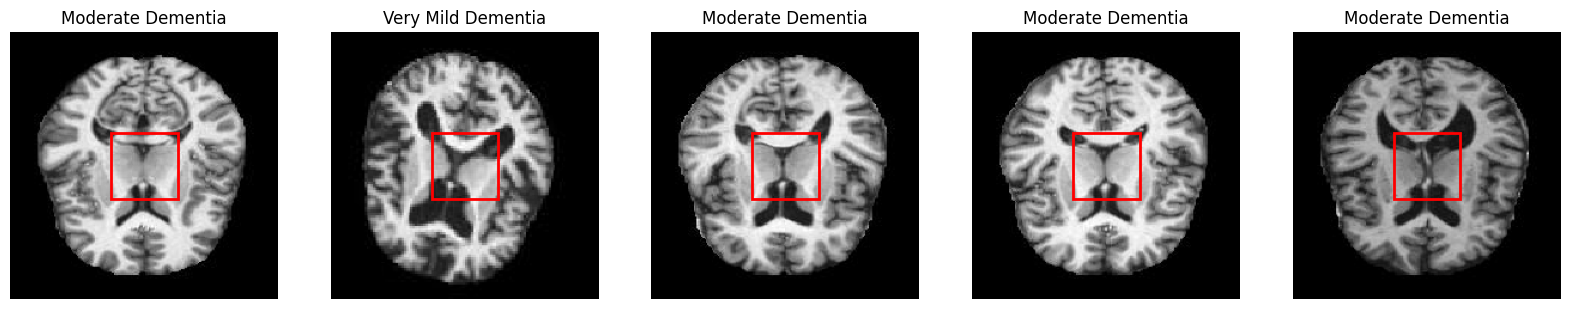

In [ ]:

#Detecting the region of the brain image where the dementia disease is located
#Image view of valid_dataset from different classes
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))
batch = next(valid_dataset)
for i in tqdm(range(0, 5)):
    rand1 = np.random.randint(batch[0].shape[0])
    gray_img = cv2.cvtColor(batch[0][rand1], cv2.COLOR_BGR2GRAY)
    ax[i].imshow(gray_img, cmap='gray')
    ax[i].axis('off')
    a = batch[1][rand1]
    if a[0] == 1:
        ax[i].set_title('Mild Dementia')
    elif a[1] == 1:
        ax[i].set_title('Moderate Dementia')
    elif a[2] == 1:
        ax[i].set_title('Non Dementia')
    elif a[3] == 1:
        ax[i].set_title('Very Mild Dementia')
    
    # Draw a rectangle around the center of the image
    x, y = gray_img.shape[:2]
    center_x, center_y = int(x/2), int(y/2)
    w, h = int(x/4), int(y/4)
    rect = patches.Rectangle((center_y-w/2, center_x-h/2), w, h, linewidth=2, edgecolor='r', facecolor='none')
    ax[i].add_patch(rect)
    
    # Draw a circle around the center of the image
    #radius = int(x/6)
    #circle = patches.Circle((center_y, center_x), radius, linewidth=2, edgecolor='b', facecolor='none')
    #ax[i].add_patch(circle)
    
plt.show()

100%|██████████| 5/5 [00:00<00:00, 200.33it/s]


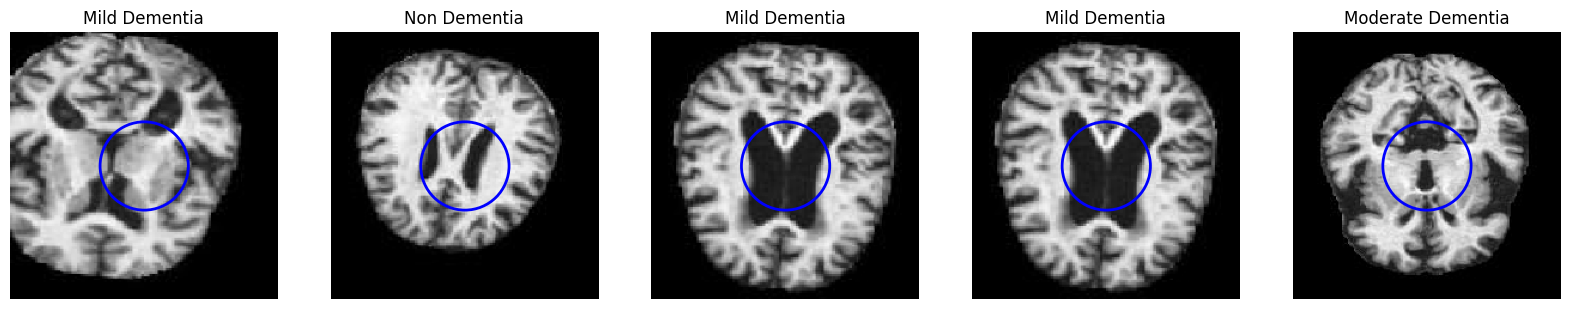

In [ ]:
# Detecting the region of the brain image where the dementia disease is located
# Image view of valid_dataset from different classes
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))
batch = next(valid_dataset)
for i in tqdm(range(0, 5)):
    rand1 = np.random.randint(batch[0].shape[0])
    gray_img = cv2.cvtColor(batch[0][rand1], cv2.COLOR_BGR2GRAY)
    ax[i].imshow(gray_img, cmap='gray')
    ax[i].axis('off')
    a = batch[1][rand1]
    if a[0] == 1:
        ax[i].set_title('Mild Dementia')
    elif a[1] == 1:
        ax[i].set_title('Moderate Dementia')
    elif a[2] == 1:
        ax[i].set_title('Non Dementia')
    elif a[3] == 1:
        ax[i].set_title('Very Mild Dementia')
    
    # Draw a rectangle around the center of the image
    x, y = gray_img.shape[:2]
    #center_x, center_y = int(x/2), int(y/2)
    #w, h = int(x/4), int(y/4)
    #rect = patches.Rectangle((center_y-w/2, center_x-h/2), w, h, linewidth=2, edgecolor='r', facecolor='none')
    #ax[i].add_patch(rect)
    
    # Draw a circle around the center of the image
    radius = int(x/6)
    circle = patches.Circle((center_y, center_x), radius, linewidth=2, edgecolor='b', facecolor='none')
    ax[i].add_patch(circle)
    
plt.show()

100%|██████████| 5/5 [00:00<00:00, 153.43it/s]


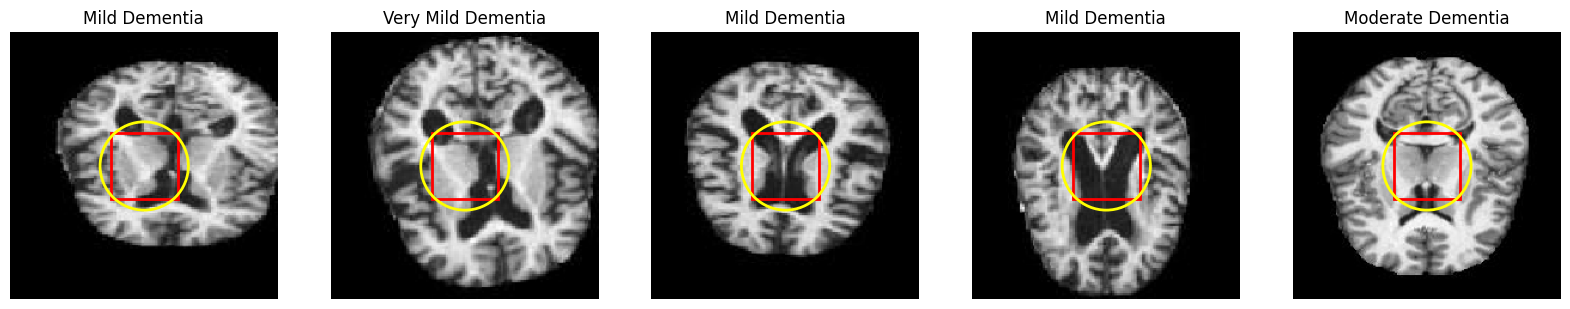

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))
batch = next(valid_dataset)
x = batch[0][0].shape[0]  # define x here
for i in tqdm(range(0, 5)):
    rand1 = np.random.randint(batch[0].shape[0])
    gray_img = cv2.cvtColor(batch[0][rand1], cv2.COLOR_BGR2GRAY)
    ax[i].imshow(gray_img, cmap='gray')
    ax[i].axis('off')
    a = batch[1][rand1]
    if a[0] == 1:
        ax[i].set_title('Mild Dementia')
    elif a[1] == 1:
        ax[i].set_title('Moderate Dementia')
    elif a[2] == 1:
        ax[i].set_title('Non Dementia')
    elif a[3] == 1:
        ax[i].set_title('Very Mild Dementia')
    
    # Draw a rectangle around the center of the image
    y = gray_img.shape[1]
    center_x, center_y = int(x/2), int(y/2)
    w, h = int(x/4), int(y/4)
    rect = patches.Rectangle((center_y-w/2, center_x-h/2), w, h, linewidth=2, edgecolor='r', facecolor='none')
    ax[i].add_patch(rect)
    
    # Draw a circle around the center of the image with yellow color
    radius = int(x/6)
    circle = patches.Circle((center_y, center_x), radius, linewidth=2, edgecolor='yellow', facecolor='none')
    ax[i].add_patch(circle)
    
plt.show()

<ipython-input-52-8f0dce3bcb40>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(models, rotation=45, ha='right')
<ipython-input-52-8f0dce3bcb40>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(models, rotation=45, ha='right')


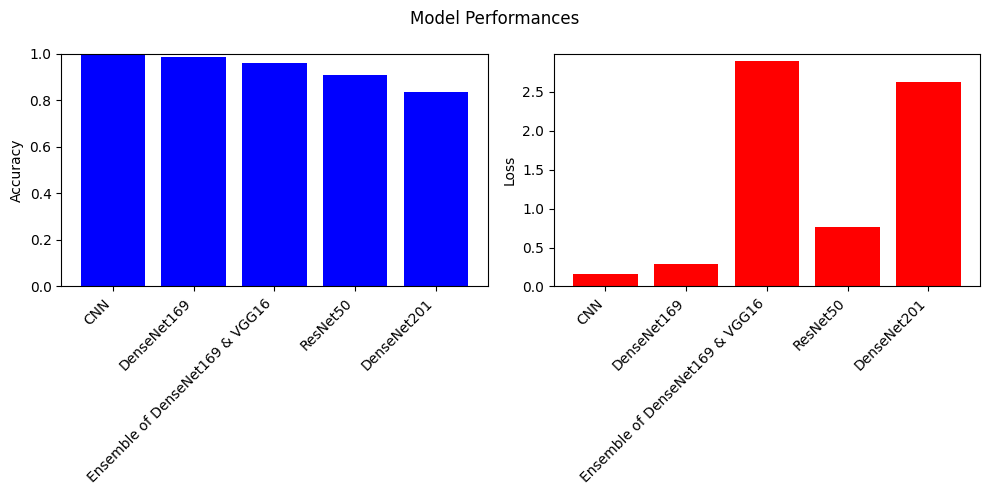

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define model names and their performances
models = ['CNN', 'DenseNet169', 'Ensemble of DenseNet169 & VGG16', 'ResNet50', 'DenseNet201']
accuracies = [0.9920, 0.9860, 0.9596, 0.9089, 0.8362]
losses = [0.1592, 0.2922, 2.8902, 0.7660, 2.6197]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the accuracies
ax1.bar(models, accuracies, color='b')
ax1.set_ylabel('Accuracy')
ax1.set_ylim([0, 1])
ax1.set_xticklabels(models, rotation=45, ha='right')

# Plot the losses
ax2.bar(models, losses, color='r')
ax2.set_ylabel('Loss')
ax2.set_ylim([0, max(losses) + 0.1])
ax2.set_xticklabels(models, rotation=45, ha='right')

# Add titles and adjust layout
plt.suptitle('Model Performances')
plt.tight_layout()

# Show the plot
plt.show()

A streamlit app was created on another attached notebook and deployed on a web for image classification and prediction.
